# Financial distress prediction

### Project Overview

Credit scoring algorithms, which makes a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. 

#### Features:
- **SeriousDlqin2yrs**: Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit
- **age**: Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years
- **DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome**: Monthly income
- **NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit
- **NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due
- **NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years
- **NumberOfDependents**: Number of dependents in family excluding themselves

#### Target:
- **SeriousDlqin2yrs**

#### Objective:
The objective is predicting the probability that somebody will experience financial distress in the next two years

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Financialdistress-GP.csv')

In [3]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df = df.drop('Unnamed: 0',1)

In [5]:
X = df.drop('SeriousDlqin2yrs',1)
y = df['SeriousDlqin2yrs']

In [6]:
count = y.value_counts()
count

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 6)

In [8]:
cols = X_train.columns.tolist()
cols

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

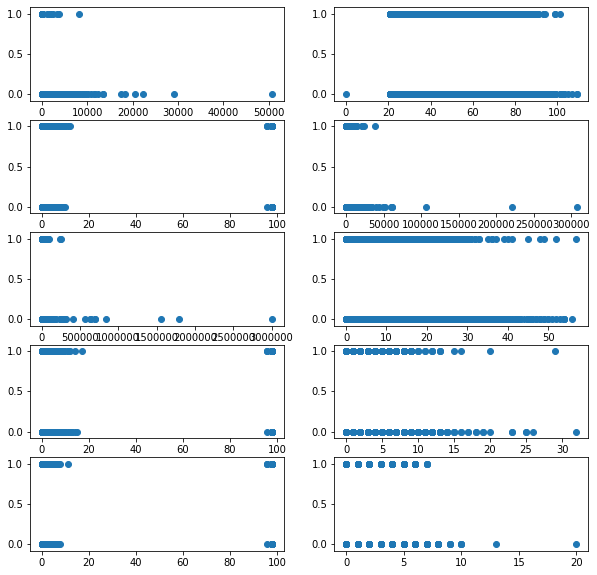

In [9]:
#Visualization

fig, axes = plt.subplots(5,2, figsize=(10,10))

for i in range(5):
    for j in range(2):
        col = cols[i * 2 + j]
        axes[i,j].scatter(X_train[col], y_train, cmap='viridis')
plt.show()

In [10]:
X_train.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20727
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2722
dtype: int64

In [11]:
X_train['MonthlyIncome'].fillna(X_train['MonthlyIncome'].median(), inplace=True)
X_train['NumberOfDependents'].fillna(X_train['NumberOfDependents'].median(), inplace=True)

In [12]:
X_test['MonthlyIncome'].fillna(X_test['MonthlyIncome'].median(), inplace=True)
X_test['NumberOfDependents'].fillna(X_test['NumberOfDependents'].median(), inplace=True)

In [13]:
X_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [14]:
X_train.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [15]:
#Feature selection - removing highly intercorrelated features

corr = X_train.corr()

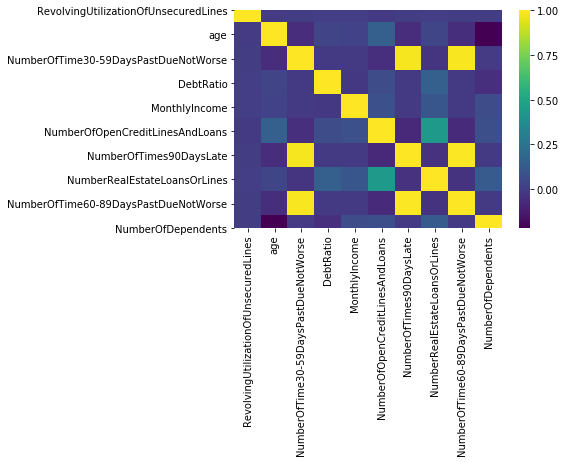

In [16]:
sns.heatmap(corr, cmap='viridis')

In [17]:
X_train.drop(columns=['NumberOfTime60-89DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse'], inplace=True)

In [18]:
X_test.drop(columns=['NumberOfTime60-89DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse'], inplace=True)

In [19]:
#Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9351111111111111


Auc score: 0.6639575962701527


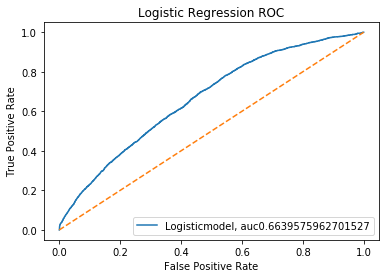

In [21]:
# Checking if our predictions were right

from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

y_pred_proba = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('Auc score:', auc)

plt.title('Logistic Regression ROC')
plt.plot(fpr,tpr,label="Logisticmodel, auc"+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [22]:
f1 = f1_score(y_test, log_reg.predict(X_test))
print("F1",f1)

precision = precision_score(y_test, log_reg.predict(X_test))
print("Precision",precision)

recall = recall_score(y_test, log_reg.predict(X_test))
print("Recall",recall)

roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print("ROCAUC",roc_auc)

print ('Confusion_matrix' + '\n', confusion_matrix(y_test, log_reg.predict(X_test)))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))

F1 0.032471835652750164
Precision 0.5568181818181818
Recall 0.016723549488054608
ROCAUC 0.5078982615517288
Confusion_matrix
 [[42031    39]
 [ 2881    49]]
Classification_report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     42070
           1       0.56      0.02      0.03      2930

    accuracy                           0.94     45000
   macro avg       0.75      0.51      0.50     45000
weighted avg       0.91      0.94      0.91     45000



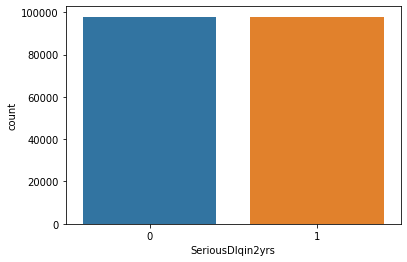

In [23]:
#Addressing data imbalance

count

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=9)

X_sample, y_sample = smote.fit_sample(X_train,y_train)

sns.countplot(y_sample)
plt.show()

ROCAUC 0.6620693124006714
Auc score: 0.7380901771872168


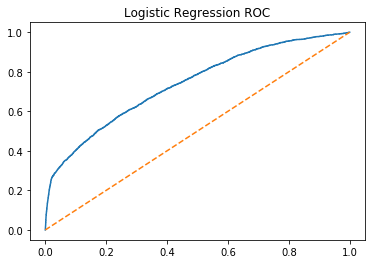

F1 0.20664327998246
Precision 0.1230899830220713
Recall 0.643344709897611
ROCAUC 0.6620693124006714
Confusion_matrix
 [[28641 13429]
 [ 1045  1885]]
Classification_report
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     42070
           1       0.12      0.64      0.21      2930

    accuracy                           0.68     45000
   macro avg       0.54      0.66      0.50     45000
weighted avg       0.91      0.68      0.76     45000



In [24]:
#Using sampled data

log_reg.fit(X_sample,y_sample)

y_pred = log_reg.predict(X_test)

score = roc_auc_score(y_test,y_pred)
print("ROCAUC",score)

y_pred_proba = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('Auc score:', auc)

plt.title('Logistic Regression ROC')
plt.plot(fpr,tpr,label="Logisticmodel, auc"+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

f1 = f1_score(y_test, y_pred)
print("F1",f1)

precision = precision_score(y_test, y_pred)
print("Precision",precision)

recall = recall_score(y_test, y_pred)
print("Recall",recall)

roc_auc = roc_auc_score(y_test, y_pred)
print("ROCAUC",roc_auc)

print ('Confusion_matrix' + '\n', confusion_matrix(y_test, y_pred))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))

In [25]:
#Improving model performance using Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=9)

rf.fit(X_sample,y_sample)

y_pred = rf.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("F1",f1)

precision = precision_score(y_test, y_pred)
print("Precision",precision)

recall = recall_score(y_test, y_pred)
print("Recall",recall)

roc_auc = roc_auc_score(y_test, y_pred)
print("ROCAUC",roc_auc)

print ('Confusion_matrix' + '\n', confusion_matrix(y_test, y_pred))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))

F1 0.3256557049660498
Precision 0.2669722767954595
Recall 0.4174061433447099
ROCAUC 0.6687933973200849
Confusion_matrix
 [[38712  3358]
 [ 1707  1223]]
Classification_report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     42070
           1       0.27      0.42      0.33      2930

    accuracy                           0.89     45000
   macro avg       0.61      0.67      0.63     45000
weighted avg       0.91      0.89      0.90     45000



ROCAUC 0.6687933973200849
Auc score: 0.7380901771872168


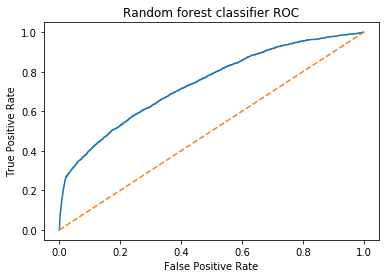

In [26]:
score = roc_auc_score(y_test,y_pred)
print("ROCAUC",score)

y_pred_proba = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('Auc score:', auc)

plt.title('Random forest classifier ROC')
plt.plot(fpr,tpr,label="Random Forest model, auc"+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()